In [28]:
import numpy as np 
import seaborn as sns 
import matplotlib as plt 
import pandas as pd
import time
import random 


# Attributs bdd

In [29]:
import os 
os.getcwd()

'C:\\Users\\33658\\OneDrive\\Desktop\\Cassiopée'

In [30]:
database = pd.read_csv('census-income_data.txt', header = None, delimiter = ",")
#à modifier selon le repository dans lequel vous vous trouvez (cf au dessus)

In [31]:
col_name = ["age - AAGE",
"class of worker - ACLSWKR",
"industry code - ADTIND",
"occupation code - ADTOCC",
# "adjusted gross income - AGI", # Omitted in DATA
"education - AHGA",
"wage per hour - AHRSPAY",
"enrolled in edu inst last wk - AHSCOL",
"marital status - AMARITL",
"major industry code - AMJIND",
"major occupation code - AMJOCC",
"race - ARACE", # typo mace -> race
"hispanic Origin - AREORGN",
"sex - ASEX",
"member of a labor union - AUNMEM",
"reason for unemployment - AUNTYPE",
"full or part time employment stat - AWKSTAT",
"capital gains - CAPGAIN",
"capital losses - CAPLOSS",
"dividends from stocks - DIVVAL", # typo divdends --> dividends
# "federal income tax liability - FEDTAX",  # Omitted in DATA
"tax filer status - FILESTAT",
"region of previous residence - GRINREG",
"state of previous residence - GRINST",
"detailed household and family stat - HHDFMX",
"detailed household summary in household - HHDREL",
"instance weight - MARSUPWT",
"migration code-change in msa - MIGMTR1",
"migration code-change in reg - MIGMTR3",
"migration code-move within reg - MIGMTR4",
"live in this house 1 year ago - MIGSAME",
"migration prev res in sunbelt - MIGSUN",
"num persons worked for employer - NOEMP",
"family members under 18 - PARENT",
# "total person earnings - PEARNVAL",  # Omitted in DATA
"country of birth father - PEFNTVTY",
"country of birth mother - PEMNTVTY",
"country of birth self - PENATVTY",
"citizenship - PRCITSHP",
# "total person income - PTOTVAL",  # Omitted in DATA
"own business or self employed - SEOTR",
# "taxable income amount - TAXINC",  # Omitted in DATA
"fill inc questionnaire for veteran's admin - VETQVA",
"veterans benefits - VETYN",
"weeks worked in year - WKSWORK",
"year", # New added
"target - Income 50k"
]

database = pd.read_csv('census-income_data.txt', header = None, delimiter = ",", names=col_name, index_col=False)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

database.head(5)

,age - AAGE,class of worker - ACLSWKR,industry code - ADTIND,occupation code - ADTOCC,education - AHGA,wage per hour - AHRSPAY,enrolled in edu inst last wk - AHSCOL,marital status - AMARITL,major industry code - AMJIND,major occupation code - AMJOCC,race - ARACE,hispanic Origin - AREORGN,sex - ASEX,member of a labor union - AUNMEM,reason for unemployment - AUNTYPE,full or part time employment stat - AWKSTAT,capital gains - CAPGAIN,capital losses - CAPLOSS,dividends from stocks - DIVVAL,tax filer status - FILESTAT,region of previous residence - GRINREG,state of previous residence - GRINST,detailed household and family stat - HHDFMX,detailed household summary in household - HHDREL,instance weight - MARSUPWT,migration code-change in msa - MIGMTR1,migration code-change in reg - MIGMTR3,migration code-move within reg - MIGMTR4,live in this house 1 year ago - MIGSAME,migration prev res in sunbelt - MIGSUN,num persons worked for employer - NOEMP,family members under 18 - PARENT,country of birth father - PEFNTVTY,country of birth mother - PEMNTVTY,country of birth self - PENATVTY,citizenship - PRCITSHP,own business or self employed - SEOTR,fill inc questionnaire for veteran's admin - VETQVA,veterans benefits - VETYN,weeks worked in year - WKSWORK,year,target - Income 50k
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Other Rel 18+ ever marr not in subfamily,Other relative of householder,1700.09,?,?,?,Not in universe under 1 year old,?,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Head of household,South,Arkansas,Householder,Householder,1053.55,MSA to MSA,Same county,Same county,No,Yes,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Child 18+ never marr Not in a subfamily,Child 18 or older,991.95,?,?,?,Not in universe under 1 year old,?,0,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1758.14,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1069.16,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


In [ ]:
database.

indexNames = database[ (dfObj['Age'] >= 30) & (dfObj['Age'] <= 40) ].index
dfObj.drop(indexNames , inplace=True)

In [49]:
database = database.loc[(database['age - AAGE'] > 20) & (database['age - AAGE'] < 60) ]

In [52]:
print(database.shape)


print(database.columns)
database.head(50)


(104281, 42)
Index(['age - AAGE', 'class of worker - ACLSWKR', 'industry code - ADTIND', 'occupation code - ADTOCC', 'education - AHGA', 'wage per hour - AHRSPAY', 'enrolled in edu inst last wk - AHSCOL', 'marital status - AMARITL', 'major industry code - AMJIND', 'major occupation code - AMJOCC', 'race - ARACE', 'hispanic Origin - AREORGN', 'sex - ASEX', 'member of a labor union - AUNMEM', 'reason for unemployment - AUNTYPE', 'full or part time employment stat - AWKSTAT', 'capital gains - CAPGAIN', 'capital losses - CAPLOSS', 'dividends from stocks - DIVVAL', 'tax filer status - FILESTAT', 'region of previous residence - GRINREG', 'state of previous residence - GRINST', 'detailed household and family stat - HHDFMX', 'detailed household summary in household - HHDREL', 'instance weight - MARSUPWT', 'migration code-change in msa - MIGMTR1', 'migration code-change in reg - MIGMTR3', 'migration code-move within reg - MIGMTR4', 'live in this house 1 year ago - MIGSAME',
       'migration pr

,age - AAGE,class of worker - ACLSWKR,industry code - ADTIND,occupation code - ADTOCC,education - AHGA,wage per hour - AHRSPAY,enrolled in edu inst last wk - AHSCOL,marital status - AMARITL,major industry code - AMJIND,major occupation code - AMJOCC,race - ARACE,hispanic Origin - AREORGN,sex - ASEX,member of a labor union - AUNMEM,reason for unemployment - AUNTYPE,full or part time employment stat - AWKSTAT,capital gains - CAPGAIN,capital losses - CAPLOSS,dividends from stocks - DIVVAL,tax filer status - FILESTAT,region of previous residence - GRINREG,state of previous residence - GRINST,detailed household and family stat - HHDFMX,detailed household summary in household - HHDREL,instance weight - MARSUPWT,migration code-change in msa - MIGMTR1,migration code-change in reg - MIGMTR3,migration code-move within reg - MIGMTR4,live in this house 1 year ago - MIGSAME,migration prev res in sunbelt - MIGSUN,num persons worked for employer - NOEMP,family members under 18 - PARENT,country of birth father - PEFNTVTY,country of birth mother - PEMNTVTY,country of birth self - PENATVTY,citizenship - PRCITSHP,own business or self employed - SEOTR,fill inc questionnaire for veteran's admin - VETQVA,veterans benefits - VETYN,weeks worked in year - WKSWORK,year,target - Income 50k
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Head of household,South,Arkansas,Householder,Householder,1053.55,MSA to MSA,Same county,Same county,No,Yes,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
5,48,Private,40,10,Some college but no degree,1200,Not in universe,Married-civilian spouse present,Entertainment,Professional specialty,Amer Indian Aleut or Eskimo,All other,Female,No,Not in universe,Full-time schedules,0,0,0,Joint both under 65,Not in universe,Not in universe,Spouse of householder,Spouse of householder,162.61,?,?,?,Not in universe under 1 year old,?,1,Not in universe,Philippines,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,95,- 50000.
6,42,Private,34,3,Bachelors degree(BA AB BS),0,Not in universe,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,5178,0,0,Joint both under 65,Not in universe,Not in universe,Householder,Householder,1535.86,Nonmover,Nonmover,Nonmover,Yes,Not in universe,6,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
7,28,Private,4,40,High school graduate,0,Not in universe,Never married,Construction,Handlers equip cleaners etc,White,All other,Female,Not in universe,Job loser - on layoff,Unemployed full-time,0,0,0,Single,Not in universe,Not in universe,Secondary individual,Nonrelative of householder,898.83,?,?,?,Not in universe under 1 year old,?,4,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,30,95,- 50000.
8,47,Local government,43,26,Some college but no degree,876,Not in universe,Married-civilian spouse present,Education,Adm support including clerical,White,All other,Female,No,Not in universe,Full-time schedules,0,0,0,Joint both under 65,Not in universe,Not in universe,Spouse of householder,Spouse of householder,1661.53,?,?,?,Not in universe under 1 year old,?,5,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95,- 50000.
9,34,Private,4,37,Some college but no degree,0,Not in universe,Married-civilian spouse present,Construction,Machine operators assmblrs & inspctrs,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Joint both under 65,Not in universe,Not in universe,Householder,

In [53]:
database.describe()

,age - AAGE,industry code - ADTIND,occupation code - ADTOCC,wage per hour - AHRSPAY,capital gains - CAPGAIN,capital losses - CAPLOSS,dividends from stocks - DIVVAL,instance weight - MARSUPWT,num persons worked for employer - NOEMP,own business or self employed - SEOTR,veterans benefits - VETYN,weeks worked in year - WKSWORK,year
count,104281.000000,104281.000000,104281.000000,104281.000000,104281.000000,104281.000000,104281.000000,104281.000000,104281.000000,104281.000000,104281.000000,104281.000000,104281.000000
mean,38.348855,25.197965,18.222639,94.106338,679.145712,54.318466,192.931387,1778.042777,3.209866,0.283053,1.992108,38.864587,94.500465
std,10.359649,16.995626,14.398556,357.774193,6015.797261,320.948711,1942.837754,1026.388700,2.291409,0.680290,0.088487,20.294370,0.500002
min,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,39.110000,0.000000,0.000000,1.000000,0.000000,94.000000
25%,30.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1077.430000,1.000000,0.000000,2.000000,26.000000,94.000000
50%,38.000000,33.000000,19.000000,0.000000,0.000000,0.000000,0.000000,1645.530000,3.000000,0.000000,2.000000,52.000000,95.000000
75%,46.000000,40.000000,32.000000,0.000000,0.000000,0.000000,0.000000,2239.920000,6.000000,0.000000,2.000000,52.000000,95.000000
max,59.000000,51.000000,46.000000,9999.000000,99999.000000,3900.000000,99999.000000,18656.300000,6.000000,2.000000,2.000000,52.000000,95.000000


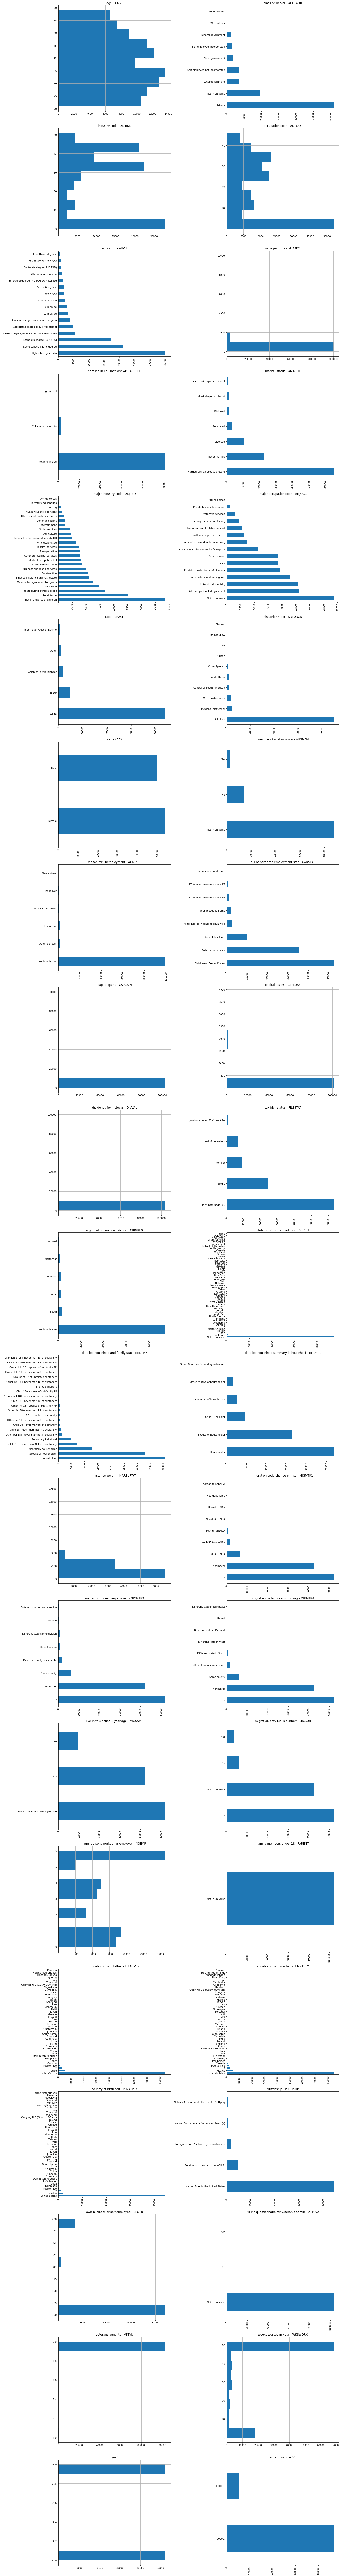

In [54]:
fig = plt.pyplot.figure(figsize=(20,150))
cols = 2
rows = np.ceil(database.shape[1] / cols)


for i, column in enumerate(database.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if database.dtypes[column] == np.object:
        database[column].value_counts().plot(kind="barh", axes=ax)
        plt.pyplot.xticks(rotation=90)   

    else:
        database[column].hist(axes=ax, orientation='horizontal')
        # plt.xticks(rotation=45)
plt.pyplot.tight_layout()

In [59]:
inc_level = database['target - Income 50k'].value_counts()

plt.pyplot.figure(figsize=(8,4))
sns.barplot(inc_level.index, inc_level.values, hue = 'sex - ASEX')
plt.pyplot.ylabel('Number of Occurrences', fontsize=12)
plt.pyplot.xlabel('Income level', fontsize=12)
plt.pyplot.show()

ValueError: Could not interpret input 'sex - ASEX'

<Figure size 576x288 with 0 Axes>

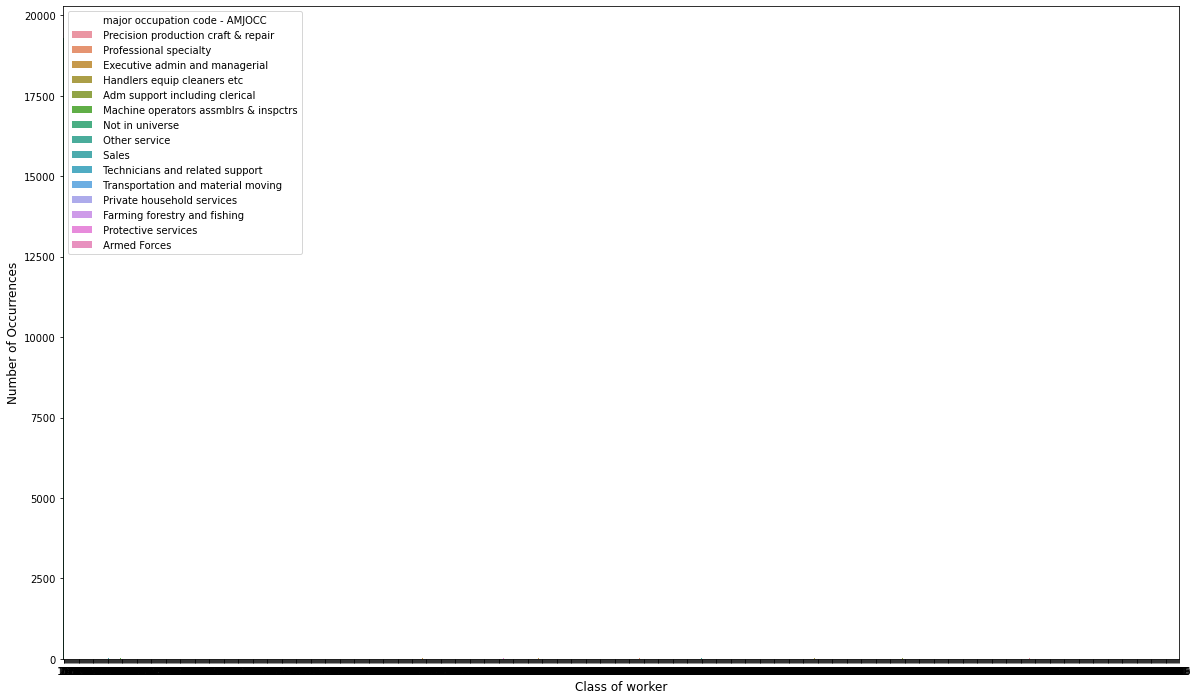

In [66]:
plt.pyplot.figure(figsize=(20,12))
sns.countplot(x='wage per hour - AHRSPAY', hue='major occupation code - AMJOCC', data=database)
plt.pyplot.ylabel('Number of Occurrences', fontsize=12)
plt.pyplot.xlabel('Class of worker', fontsize=12)
plt.pyplot.show()

In [57]:
database.groupby('education - AHGA').mean()

,age - AAGE,industry code - ADTIND,occupation code - ADTOCC,wage per hour - AHRSPAY,capital gains - CAPGAIN,capital losses - CAPLOSS,dividends from stocks - DIVVAL,instance weight - MARSUPWT,num persons worked for employer - NOEMP,own business or self employed - SEOTR,veterans benefits - VETYN,weeks worked in year - WKSWORK,year
education - AHGA,,,,,,,,,,,,,
10th grade,39.368855,16.850377,20.851453,73.607104,138.167564,36.262289,33.538931,1797.064715,2.262289,0.187657,1.993900,29.011482,94.482957
11th grade,37.384690,17.736893,21.154390,79.874558,138.477324,27.243487,36.520425,1795.754017,2.357993,0.208106,1.997748,29.258926,94.490511
12th grade no diploma,36.552142,19.018622,21.891993,62.589385,133.829609,28.876164,23.890130,1766.706276,2.452514,0.229981,1.995345,31.313780,94.478585
1st 2nd 3rd or 4th grade,41.615210,14.282633,21.863791,40.295119,55.658343,21.006810,3.671964,1590.158808,1.937571,0.120318,1.996595,27.202043,94.508513
5th or 6th grade,39.249038,14.903793,22.483782,40.053876,69.507971,26.322155,2.383178,1524.015014,2.036284,0.114898,1.999450,28.452996,94.514568
7th and 8th grade,42.177007,13.750976,19.005206,61.146638,74.988720,30.087202,17.397397,1701.348863,1.933623,0.133623,1.992191,26.317570,94.498482
9th grade,38.793393,15.182446,19.805720,70.031065,96.678501,19.520217,26.531558,1739.977322,2.157791,0.184418,1.995069,27.429980,94.505917
Associates degree-academic program,37.741518,28.998187,16.334369,117.737115,407.712510,57.378140,143.948718,1822.964812,3.570837,0.332815,1.985237,42.572650,94.511785
Associates degree-occup /vocational,37.739338,28.156094,19.059970,135.440355,507.581511,51.820307,177.808400,1726.368827,3.475428,0.328210,1.989608,43.006711,94.491665


In [58]:
database.groupby("race - ARACE").mean()

,age - AAGE,industry code - ADTIND,occupation code - ADTOCC,wage per hour - AHRSPAY,capital gains - CAPGAIN,capital losses - CAPLOSS,dividends from stocks - DIVVAL,instance weight - MARSUPWT,num persons worked for employer - NOEMP,own business or self employed - SEOTR,veterans benefits - VETYN,weeks worked in year - WKSWORK,year
race - ARACE,,,,,,,,,,,,,
Amer Indian Aleut or Eskimo,37.096343,23.849242,18.594112,113.197145,262.431757,28.800178,215.859054,1037.485531,3.000892,0.322926,1.987511,32.262266,94.505798
Asian or Pacific Islander,37.107861,24.903073,15.217199,75.851655,759.799350,52.568262,219.286052,1570.341501,3.046395,0.200059,1.996454,36.437943,94.558511
Black,37.887843,24.989169,18.938354,100.002632,312.392347,37.296184,54.297803,2277.445494,3.354793,0.211965,1.990687,34.399838,94.501974
Other,34.691721,21.977669,20.563725,51.985294,458.807734,52.057190,97.632898,1088.752353,2.901961,0.223856,1.995643,34.757081,94.660675
White,38.540455,25.317030,18.204302,94.781526,727.088632,56.667333,209.166078,1753.797806,3.208969,0.294943,1.992085,39.628394,94.494657
